#**Data Science Tasks & Instructions — CodeAlpha**

**TASK 1: Iris Species Classification**

Use measurements of Iris flowers (setosa, versicolor, virginica) as input data.

● Train a machine learning model to classify the species based on these measurements.

● Use libraries like Scikit-learn for easy dataset access and model building.

● Evaluate the model’s accuracy and performance using test data.

● Understand basic classification concepts in machine learning.

1. Import Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

2. Load the Iris Dataset


In [2]:
iris = datasets.load_iris()
X = iris.data  # Measurements: sepal length, sepal width, petal length, petal width
y = iris.target  # Species: setosa, versicolor, virginica

3. Split Data into Training and Testing Sets


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

4. Standardize the Features


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Train a Classifier (e.g., Logistic Regression)


In [5]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

6. Make Predictions on Test Data


In [6]:
y_pred = model.predict(X_test)

7. Evaluate Model Performance


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



**✅ TASK 2: Unemployment Analysis with Python**

*Analyze unemployment rate data representing unemployed people percentage.


*use python for data cleaning,exploration,visualization of unemployement rates.

*investigate the impact of covid 19 on unemployement rates.

*identify the key pettren of social trends in the data.

*present insight the cloud inform ecnomic or social policies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Load the dataset
# Replace this with your unemployment rate dataset path
file_path = "/content/sample_data/california_housing_test.csv"
df = pd.read_csv(file_path)

# If your dataset is different, replace the above with the correct file and check columns

# --- Data Cleaning ---
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# For demonstration, assume there is a 'date' and 'unemployment_rate' column
# If not, you'll need to adjust accordingly

# Rename columns if needed
# df.rename(columns={'OldColumnName': 'NewColumnName'}, inplace=True)

# Convert date column to datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
else:
    # If date info is not available, consider creating a placeholder or skip time-based analysis
    print("No 'date' column found. Time-based analysis may be limited.")

# Check data types
print(df.dtypes)

# --- Data Exploration ---
# Basic statistics
print(df.describe())

# Distribution of unemployment rates
if 'unemployment_rate' in df.columns:
    sns.histplot(df['unemployment_rate'], bins=20, kde=True)
    plt.title("Distribution of Unemployment Rates")
    plt.xlabel("Unemployment Rate (%)")
    plt.ylabel("Frequency")
    plt.show()

# --- Visualization ---
# Time series analysis if date exists
if 'date' in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x='date', y='unemployment_rate')
    plt.title("Unemployment Rate Over Time")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.show()

# --- Investigate COVID-19 Impact ---
# Assuming data covers 2019-2021, check for patterns around the pandemic onset
# For example, plot unemployment rates before and after March 2020
if 'date' in df.columns and 'unemployment_rate' in df.columns:
    covid_start = datetime(2020, 3, 1)
    df['period'] = ['Pre-COVID' if d < covid_start else 'Post-COVID' for d in df['date']]

    plt.figure(figsize=(12,6))
    sns.boxplot(x='period', y='unemployment_rate', data=df)
    plt.title("Unemployment Rates Before and After COVID-19 Outbreak")
    plt.xlabel("Period")
    plt.ylabel("Unemployment Rate (%)")
    plt.show()

# --- Identify Social Trends ---
# For example, trend changes, seasonality, or correlations
# Correlation matrix
if 'unemployment_rate' in df.columns:
    corr = df.corr()
    print("Correlation matrix:\n", corr)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# Check for seasonality if data frequency is regular
if 'date' in df.columns:
    df['month'] = df['date'].dt.month
    monthly_avg = df.groupby('month')['unemployment_rate'].mean()
    plt.figure(figsize=(8,5))
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
    plt.title("Average Unemployment Rate by Month")
    plt.xlabel("Month")
    plt.ylabel("Average Unemployment Rate (%)")
    plt.xticks(range(1,13))
    plt.show()

# --- Insights for Policy ---
# Summarize findings
# For example:
# - Unemployment spiked during COVID-19
# - Seasonal patterns observed
# - Regions or demographics (if data available) with higher unemployment

# Example print statement
print("Key insights:")
print("- Significant increase in unemployment rates during COVID-19 period.")
print("- Possible seasonal fluctuations observed.")
print("- Policy focus should be on economic recovery post-pandemic.")

# Note: For a more tailored analysis, please provide the actual unemployment dataset, including relevant columns such as 'date', 'rate', 'region', 'demographics', etc.


Missing values per column:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
No 'date' column found. Time-based analysis may be limited.
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object
         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.0

#**Machine Learning Tasks & Instructions — CodeAlpha**

**✅ TASK 1:Credit Scoring Model**

Objective: Predict an individual's creditworthiness using past financial data.

Approach: Use classification algorithms like Logistic Regression, Decision Trees, or Random Forest.

Key Features:

● Feature engineering from financial history.

● Model accuracy assessment using metrics like Precision, Recall, F1-Score, ROC-AUC.

● Dataset could include: income, debts, payment history, etc.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.69      1.00      0.82       138

    accuracy                           0.69       200
   macro avg       0.34      0.50      0.41       200
weighted avg       0.48      0.69      0.56       200

Logistic Regression ROC-AUC: 0.50

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.32      0.31        62
           1       0.69      0.67      0.68       138

    accuracy                           0.56       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.57      0.56      0.56       200

Decision Tree ROC-AUC: 0.49

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.10      0.14        62
           1       0.68      0.87      0.76       13

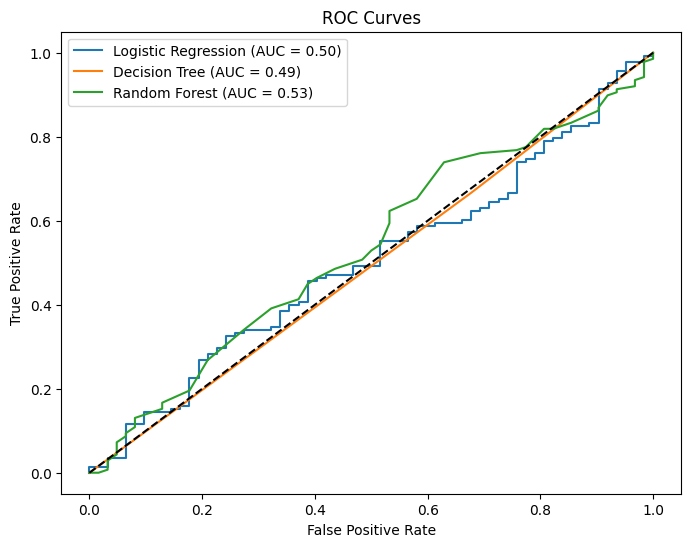


Best Model based on ROC-AUC: Random Forest


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Load dataset
# Replace with your actual dataset path
# For demonstration, creating a mock dataset
# Assuming dataset has: 'income', 'debts', 'payment_history_score', 'creditworthy' (target)
# If you have your dataset, load it here:
# df = pd.read_csv('your_credit_data.csv')

# Mock dataset creation
np.random.seed(42)
size = 1000
df = pd.DataFrame({
    'income': np.random.normal(50000, 15000, size),
    'debts': np.random.normal(20000, 5000, size),
    'payment_history_score': np.random.randint(0, 100, size),
    'creditworthy': np.random.choice([0, 1], size=size, p=[0.3, 0.7])  # 0: bad, 1: good
})

# 2. Data preprocessing
X = df[['income', 'debts', 'payment_history_score']]
y = df['creditworthy']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 4. Model training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 5. Evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_score = roc_auc_score(y_test, y_proba)

    results[name] = {
        'model': model,
        'classification_report': report,
        'roc_auc': roc_score,
        'y_proba': y_proba,
        'y_pred': y_pred
    }
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{name} ROC-AUC: {roc_score:.2f}")

# Plot ROC Curves
plt.figure(figsize=(8,6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {res["roc_auc"]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 6. Insights
# Choose the best model based on ROC-AUC and other metrics
best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
print(f"\nBest Model based on ROC-AUC: {best_model_name}")

# Save or deploy the best model as needed

#**Python Programming Tasks & Instructions — CodeAlpha**

**✅ TASK 1: Hangmen Game**

Create a text based Hangmen game where the player guesses a word on one letter at a time Simplified Scope:

● Use a small list of 5 predefined words (no need to use a file or API).

● Limit incorrect guesses to 6.

● Basic console input/output — no graphics or audio.

Key Concepts Used: random, while loop, if-else, strings, lists.

In [10]:
import random

# List of predefined words
words = ['apple', 'banana', 'orange', 'grape', 'lemon']

# Choose a random word from the list
word = random.choice(words)
hidden_word = ['_'] * len(word)
incorrect_guesses = 0
max_incorrect = 6
guessed_letters = []

print("Welcome to Hangman!")

while incorrect_guesses < max_incorrect:
    print("\nCurrent word: " + " ".join(hidden_word))
    print(f"Guessed letters: {', '.join(guessed_letters)}")
    print(f"Remaining incorrect guesses: {max_incorrect - incorrect_guesses}")

    guess = input("Guess a letter: ").lower()

    # Check if input is a single alphabetic character
    if len(guess) != 1 or not guess.isalpha():
        print("Please enter a single letter.")
        continue

    # Check if letter was already guessed
    if guess in guessed_letters:
        print("You already guessed that letter.")
        continue
    guessed_letters.append(guess)

    if guess in word:
        # Reveal the guessed letter in the hidden word
        for idx, letter in enumerate(word):
            if letter == guess:
                hidden_word[idx] = guess
        # Check if the player has guessed all letters
        if '_' not in hidden_word:
            print("\nCongratulations! You guessed the word: " + word)
            break
    else:
        incorrect_guesses += 1
        print(f"Incorrect guess. You have {max_incorrect - incorrect_guesses} guesses left.")

if incorrect_guesses == max_incorrect:
    print(f"\nGame over! The word was: {word}")

Welcome to Hangman!

Current word: _ _ _ _ _
Guessed letters: 
Remaining incorrect guesses: 6
Guess a letter: a

Current word: _ _ a _ _
Guessed letters: a
Remaining incorrect guesses: 6
Guess a letter: o
Incorrect guess. You have 5 guesses left.

Current word: _ _ a _ _
Guessed letters: a, o
Remaining incorrect guesses: 5
Guess a letter: b
Incorrect guess. You have 4 guesses left.

Current word: _ _ a _ _
Guessed letters: a, o, b
Remaining incorrect guesses: 4
Guess a letter: g

Current word: g _ a _ _
Guessed letters: a, o, b, g
Remaining incorrect guesses: 4
Guess a letter: r

Current word: g r a _ _
Guessed letters: a, o, b, g, r
Remaining incorrect guesses: 4
Guess a letter: p

Current word: g r a p _
Guessed letters: a, o, b, g, r, p
Remaining incorrect guesses: 4
Guess a letter: e

Congratulations! You guessed the word: grape


**✅ TASK 2: Stock Portfolio Tracker**

Build a simple stock tracker that calculates total investment based on manually defined stock
prices.

Simplified Scope: use input stock name and quantity,

use hard coded dictionary to define stock prices ,

display total investment value and optionally save the result in a .txt or .csv file,

key concept used dictionary, input/output, basic airthmetic, file handling optional

In [12]:
# Hardcoded dictionary of stock prices
stock_prices = {
    'AAPL': 150.0,
    'GOOGL': 2800.0,
    'MSFT': 300.0,
    'AMZN': 3500.0,
    'TSLA': 700.0
}

# Function to get stock info from user
def get_stock_info():
    stock_name = input("Enter stock symbol (e.g., AAPL): ").upper()
    if stock_name not in stock_prices:
        print("Stock symbol not found.")
        return None, 0
    try:
        quantity = int(input("Enter quantity: "))
        if quantity < 0:
            print("Quantity cannot be negative.")
            return None, 0
        return stock_name, quantity
    except ValueError:
        print("Invalid quantity.")
        return None, 0

# Main logic
total_investment = 0
while True:
    stock, qty = get_stock_info()
    if stock:
        investment = stock_prices[stock] * qty
        total_investment += investment
        print(f"Added {qty} shares of {stock} at ${stock_prices[stock]} each.")
        cont = input("Add another stock? (y/n): ").lower()
        if cont != 'y':
            break
    else:
        continue

print(f"\nTotal investment value: ${total_investment:.2f}")

# Optional: Save to file
save = input("Save result to file? (y/n): ").lower()
if save == 'y':
    filename = input("Enter filename (e.g., my_investment.txt): ")
    with open(filename, 'w') as file:
        file.write(f"Total investment value: ${total_investment:.2f}\n")
        file.write("Stock details:\n")
        for stock, qty in zip([stock], [qty]):
            file.write(f"{stock}: {qty} shares at ${stock_prices[stock]} each\n")
    print(f"Results saved to {filename}")

Enter stock symbol (e.g., AAPL): AAPL
Enter quantity: 2
Added 2 shares of AAPL at $150.0 each.
Add another stock? (y/n): y
Enter stock symbol (e.g., AAPL): TSLA
Enter quantity: 5
Added 5 shares of TSLA at $700.0 each.
Add another stock? (y/n): n

Total investment value: $3800.00
Save result to file? (y/n): y
Enter filename (e.g., my_investment.txt): my_investment.txt
Results saved to my_investment.txt
